# Tech Professional Salary Prediction Model
Our purpose is to predict a tech professional salary.

## Imports

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

## Loading Data
Our data comes from 2025's [Stack Overflow Annual Developer Survey](https://survey.stackoverflow.co/).

In [18]:
# Load to DataFrame
df = pd.read_csv("../data/raw/survey_results_public.csv")

In [27]:
df.head()

,ResponseId,MainBranch,Age,EdLevel,Employment,EmploymentAddl,WorkExp,LearnCodeChoose,LearnCode,LearnCodeAI,...,AIAgentOrchestration,AIAgentOrchWrite,AIAgentObserveSecure,AIAgentObsWrite,AIAgentExternal,AIAgentExtWrite,AIHuman,AIOpen,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Employed,"Caring for dependents (children, elderly, etc.)",8.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,Vertex AI,NaN,NaN,NaN,ChatGPT,NaN,When I don’t trust AI’s answers,"Troubleshooting, profiling, debugging",61256.0,10.0
1,2,I am a developer by profession,25-34 years old,"Associate degree (A.A., A.S., etc.)",Employed,NaN,2.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers;When I want to...,All skills. AI is a flop.,104413.0,9.0
2,3,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)","Independent contractor, freelancer, or self-em...",None of the above,10.0,"Yes, I am not new to coding but am learning ne...",Online Courses or Certification (includes all ...,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code;GitHub Copilot;Google Gemini,NaN,When I don’t trust AI’s answers;When I want to...,"Understand how things actually work, problem s...",53061.0,8.0
3,4,I am a developer by profession,35-44 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Employed,None of the above,4.0,"Yes, I am not new to coding but am learning ne...","Other online resources (e.g. standard search, ...","Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,ChatGPT;Claude Code,NaN,When I don’t trust AI’s answers;When I want to...,NaN,36197.0,6.0
4,5,I am a developer by profession,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...","Caring for dependents (children, elderly, etc.)",21.0,"No, I am not new to coding and did not learn n...",NaN,"Yes, I learned how to use AI-enabled tools for...",...,NaN,NaN,NaN,NaN,NaN,NaN,When I don’t trust AI’s answers,"critical thinking, the skill to define the tas...",60000.0,7.0


## Attributes engineering

Our target variable will be `ConvertedCompYearly`

In [40]:
# Describe `ConvertedCompYearly` field
df["ConvertedCompYearly"].describe()

count    2.394700e+04
mean     1.017615e+05
std      4.617569e+05
min      1.000000e+00
25%      3.817100e+04
50%      7.532000e+04
75%      1.205960e+05
max      5.000000e+07
Name: ConvertedCompYearly, dtype: float64

### Attributes selection

The dataset has 172 columns. However, we're going to select the following:

In [134]:
df_train = df[["Country", "DevType", "EdLevel", "YearsCode", "Employment", "ConvertedCompYearly"]].copy()
df_train.head()

,Country,DevType,EdLevel,YearsCode,Employment,ConvertedCompYearly
0,Ukraine,"Developer, mobile","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",14.0,Employed,61256.0
1,Netherlands,"Developer, back-end","Associate degree (A.A., A.S., etc.)",10.0,Employed,104413.0
2,Ukraine,"Developer, front-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12.0,"Independent contractor, freelancer, or self-em...",53061.0
3,Ukraine,"Developer, back-end","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5.0,Employed,36197.0
4,Ukraine,Engineering manager,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",22.0,"Independent contractor, freelancer, or self-em...",60000.0


In [135]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49191 entries, 0 to 49190
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Country              35437 non-null  object 
 1   DevType              43680 non-null  object 
 2   EdLevel              48149 non-null  object 
 3   YearsCode            43042 non-null  float64
 4   Employment           48339 non-null  object 
 5   ConvertedCompYearly  23947 non-null  float64
dtypes: float64(2), object(4)
memory usage: 2.3+ MB


### Data cleaning

#### Cleaning `ConvertedCompYearly` column

In [136]:
df_train["ConvertedCompYearly"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 49191 entries, 0 to 49190
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23947 non-null  float64
dtypes: float64(1)
memory usage: 384.4 KB


We'll ignore null values.

In [137]:
# Keep only not null values
df_train = df_train[df_train["ConvertedCompYearly"].notnull()]
df_train["ConvertedCompYearly"].info()

<class 'pandas.core.series.Series'>
Index: 23947 entries, 0 to 49122
Series name: ConvertedCompYearly
Non-Null Count  Dtype  
--------------  -----  
23947 non-null  float64
dtypes: float64(1)
memory usage: 374.2 KB


Let's also explore `ConvertedCompYearly` distribution

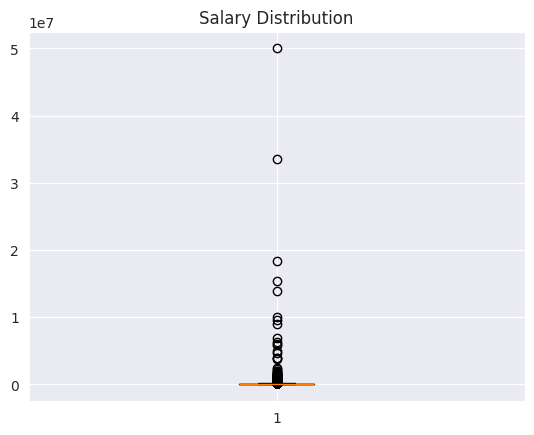

In [139]:
plt.title("Salary Distribution")
plt.boxplot(df_train["ConvertedCompYearly"])
plt.show()

Let's remove those outliers using Modified Z-Score.

<Axes: title={'center': 'Salary Distribution'}, xlabel='ConvertedCompYearlyClasses'>

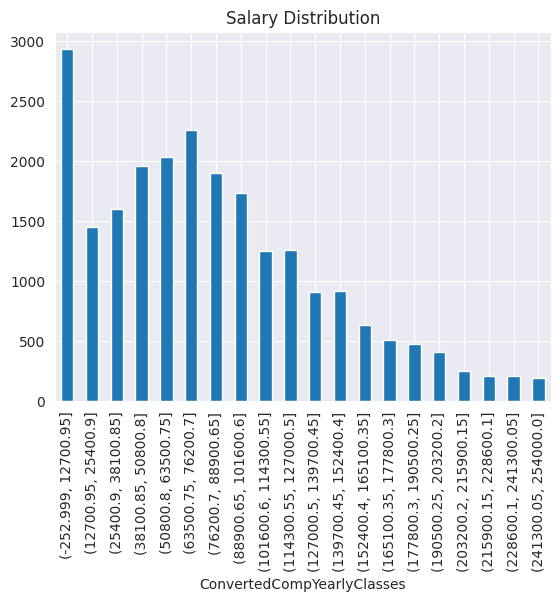

In [160]:
# Calculate Modified Z-Score
x = df_train["ConvertedCompYearly"]
median = np.median(x)
mad = stats.median_abs_deviation(x, scale='normal')
mod_z = 0.6745 * (x - median) / mad

# Remove outliers
df_train_v1 = df_train[mod_z.abs() <= 2] # Defining a low Z-Score because this dataset is small

# Plot result
plt.title("Salary Distribution")
df_train_v1["ConvertedCompYearlyClasses"] = pd.cut(df_train_v1["ConvertedCompYearly"], bins=20)
df_train_v1["ConvertedCompYearlyClasses"].value_counts().sort_index().plot(kind="bar")

#### Cleaning `Country` column

In [162]:
# Show info
df_train_v1["Country"].info()

<class 'pandas.core.series.Series'>
Index: 23072 entries, 0 to 49122
Series name: Country
Non-Null Count  Dtype 
--------------  ----- 
23072 non-null  object
dtypes: object(1)
memory usage: 360.5+ KB


There are **no null values** in this field. Therefore, we'll turn our focus into evaluating the category distribution parameters.

In [163]:
# Show describe of value counts
df_train_v1["Country"].value_counts().describe()

count     164.000000
mean      140.682927
std       441.880099
min         1.000000
25%         4.000000
50%        16.500000
75%       101.500000
max      4645.000000
Name: count, dtype: float64

There are **categories with too low frequency**. Let's filter categories with more than 100 records.

In [164]:
# Create filter
count_df = df_train_v1["Country"].value_counts().reset_index()
filtered_list = count_df[count_df["count"] > 100]["Country"]

# Apply filter
df_train_v2 = df_train_v1[df_train_v1["Country"].isin(filtered_list)]

# Show results
df_train_v2["Country"].value_counts().describe()

count      42.000000
mean      498.571429
std       773.604239
min       101.000000
25%       158.500000
50%       201.000000
75%       574.500000
max      4645.000000
Name: count, dtype: float64

We'll also calculate the **distribution Entropy** to evaluate balance.

In [165]:
# Entropy evaluation
p = df_train_v2["Country"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.8335501285559184


This confirms that the category distribution is fairly balanced. Now, we'll consider `Country` column cleaned.

#### Cleaning `DevType` column

In [166]:
# Show info
df_train_v2["DevType"].info()

<class 'pandas.core.series.Series'>
Index: 20940 entries, 0 to 49122
Series name: DevType
Non-Null Count  Dtype 
--------------  ----- 
20940 non-null  object
dtypes: object(1)
memory usage: 327.2+ KB


There are **no null values**. Let's turn our attention to the category distribution parameters.

In [167]:
# Show describe of value counts
df_train_v2["DevType"].value_counts().describe()

count      32.000000
mean      654.375000
std      1246.226737
min        38.000000
25%       138.250000
50%       227.000000
75%       641.750000
max      6534.000000
Name: count, dtype: float64

We'll cut off the low frequency categories.

In [168]:
# Create filter
count_df = df_train_v2["DevType"].value_counts().reset_index()
filtered_list = count_df[count_df["count"] > 100]["DevType"]

# Apply filter
df_train_v3 = df_train_v2[df_train["DevType"].isin(filtered_list)]

# Show results
df_train_v3["DevType"].value_counts().describe()

count      27.000000
mean      763.481481
std      1331.366053
min       102.000000
25%       169.000000
50%       312.000000
75%       686.500000
max      6534.000000
Name: count, dtype: float64

Now, let's evaluate the Entropy.

In [169]:
# Entropy evaluation
p = df_train_v3["DevType"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.7659708742013306


The distribution is balanced. Now, we'll consider the `DevType` column cleaned.

#### Cleaning `EdLevel` column

In [170]:
# Show info
df_train_v3["EdLevel"].info()

<class 'pandas.core.series.Series'>
Index: 20614 entries, 0 to 49122
Series name: EdLevel
Non-Null Count  Dtype 
--------------  ----- 
20601 non-null  object
dtypes: object(1)
memory usage: 322.1+ KB


We'll remove the null values.

In [172]:
# Remove null
df_train_v4 = df_train_v3[df_train["EdLevel"].notnull()]
df_train_v4["EdLevel"].info()

<class 'pandas.core.series.Series'>
Index: 20601 entries, 0 to 49122
Series name: EdLevel
Non-Null Count  Dtype 
--------------  ----- 
20601 non-null  object
dtypes: object(1)
memory usage: 321.9+ KB


We should make sure that the values make sense for our model purposes

In [202]:
# Show value counts
df_train_v4["EdLevel"].value_counts()

EdLevel
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                                          8796
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                                       6107
Some college/university study without earning a degree                                2457
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                                        1172
Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)    1069
Associate degree (A.A., A.S., etc.)                                                    697
Other (please specify):                                                                199
Primary/elementary school                                                              104
Name: count, dtype: int64

We'll remove the 'Other (please specify):' value, and also simplify this categories

In [207]:
# Remove 'Other...' value
df_train_v5 = df_train_v4[df_train_v4["EdLevel"] != "Other (please specify):"]

# Simplify categories
def simplify_ed_level(x):
    if "Bachelor’s degree" in x:
        return "Bachelor’s degree"
    elif "Master’s degree" in x:
        return "Master’s degree"
    elif "Professional degree" in x:
        return "Doctor’s degree"
    else:
        return "Less than Bachelor’s"

df_train_v6 = df_train_v5.copy()
df_train_v6["EdLevel"] = df_train_v5["EdLevel"].apply(simplify_ed_level)

# Show results
df_train_v6["EdLevel"].value_counts()

EdLevel
Bachelor’s degree       8796
Master’s degree         6107
Less than Bachelor’s    4327
Doctor’s degree         1172
Name: count, dtype: int64

Now, we'll evaluate its distribution

In [208]:
# Show describe of value counts
df_train_v6["EdLevel"].value_counts().describe()

count       4.000000
mean     5100.500000
std      3199.019485
min      1172.000000
25%      3538.250000
50%      5217.000000
75%      6779.250000
max      8796.000000
Name: count, dtype: float64

We'll calculate the distribution Entropy.

In [209]:
# Entropy evaluation
p = df_train_v6["EdLevel"].value_counts(normalize=True)
H = stats.entropy(p, base=2)
H_norm = H / np.log2(len(p))
print(f"H = {H_norm}")

H = 0.877733083870204


We'll now consider `EdLevel` column cleaned.

#### Cleaning `YearsCode` column

In [210]:
# Show info
df_train_v6["YearsCode"].info()

<class 'pandas.core.series.Series'>
Index: 20402 entries, 0 to 49122
Series name: YearsCode
Non-Null Count  Dtype  
--------------  -----  
20320 non-null  float64
dtypes: float64(1)
memory usage: 318.8 KB


We'll remove the null values.

In [211]:
# Remove null
df_train_v7 = df_train_v6[df_train_v4["YearsCode"].notnull()]

# Show results
df_train_v7["YearsCode"].info()

<class 'pandas.core.series.Series'>
Index: 20320 entries, 0 to 49122
Series name: YearsCode
Non-Null Count  Dtype  
--------------  -----  
20320 non-null  float64
dtypes: float64(1)
memory usage: 317.5 KB


Now, evaluate its distribution

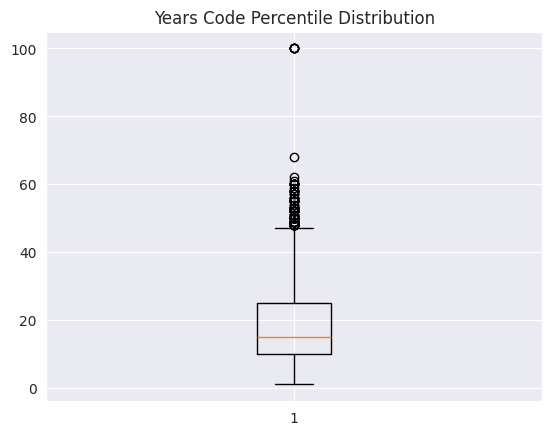

In [212]:
plt.title("Years Code Percentile Distribution")
plt.boxplot(df_train_v7["YearsCode"])
plt.show()

Let's remove the outliers with the IQR (Interquartile Range)

<Axes: title={'center': 'Years Code Distribution'}, xlabel='Counts', ylabel='Years'>

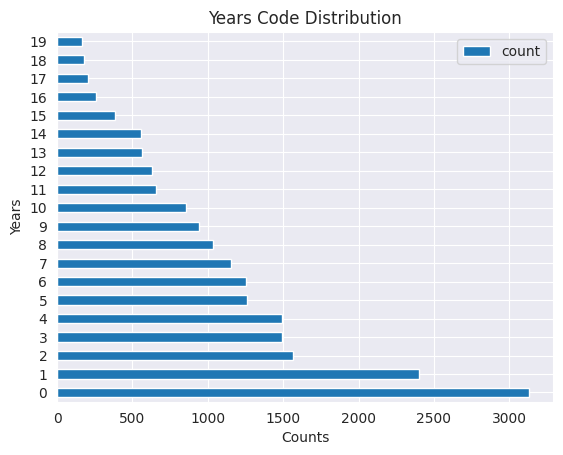

In [215]:
# Defining IQR
q1 = df_train_v7["YearsCode"].quantile(0.25)
q3 = df_train_v7["YearsCode"].quantile(0.75)
iqr = q3 - q1

# Setting limits
lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

# Filtering dataset
df_train_v8 = df_train_v7[(df["YearsCode"] >= lower) & (df["YearsCode"] <= upper)].copy()

# Show results
df_train_v8["YearsCodeClasses"] = pd.cut(df_train_v8["YearsCode"], bins=20)
df_train_v8["YearsCodeClasses"].value_counts().reset_index().plot(
    kind="barh",
    title="Years Code Distribution",
    xlabel="Counts",
    ylabel="Years")

#### Cleaning `Employment` column

In [216]:
# Show info
df_train_v8["Employment"].info()

<class 'pandas.core.series.Series'>
Index: 20172 entries, 0 to 49122
Series name: Employment
Non-Null Count  Dtype 
--------------  ----- 
20172 non-null  object
dtypes: object(1)
memory usage: 315.2+ KB


No null values. We'll turn the attention to the distribution.

In [217]:
df_train_v8["Employment"].value_counts()

Employment
Employed                                                16671
Independent contractor, freelancer, or self-employed     2438
Student                                                   593
Not employed                                              384
Retired                                                    50
I prefer not to say                                        36
Name: count, dtype: int64

The column is dominated by `Employed` value. This variable could undermine the model fit. For now, we'll keep this variable, but only the top 3 values.

In [218]:
# Defining values to keep
values_to_keep = ["Employed",
                  "Independent contractor, freelancer, or self-employed",
                  "Student"]

# Filtering dataset
df_train_v9 = df_train_v8[df_train_v6["Employment"].isin(values_to_keep)]

# Show results
df_train_v9["Employment"].value_counts()

Employment
Employed                                                16671
Independent contractor, freelancer, or self-employed     2438
Student                                                   593
Name: count, dtype: int64

#### Cleaning analysis residuals

We'll delete the auxiliar columns we've created

In [241]:
# Delete unused columns
df_train_final = df_train_v9.drop(["ConvertedCompYearlyClasses", "YearsCodeClasses"], axis=1).copy()

# Show results
df_train_final

,Country,DevType,EdLevel,YearsCode,Employment,ConvertedCompYearly
0,Ukraine,"Developer, mobile",Master’s degree,14.0,Employed,61256.0
1,Netherlands,"Developer, back-end",Less than Bachelor’s,10.0,Employed,104413.0
2,Ukraine,"Developer, front-end",Bachelor’s degree,12.0,"Independent contractor, freelancer, or self-em...",53061.0
3,Ukraine,"Developer, back-end",Bachelor’s degree,5.0,Employed,36197.0
4,Ukraine,Engineering manager,Master’s degree,22.0,"Independent contractor, freelancer, or self-em...",60000.0
...,...,...,...,...,...,...
49089,India,"Developer, full-stack",Less than Bachelor’s,2.0,Student,4650.0
49098,Poland,DevOps engineer or professional,Doctor’s degree,6.0,"Independent contractor, freelancer, or self-em...",2729.0
49106,South Africa,"Developer, desktop or enterprise applications",Bachelor’s degree,29.0,Employed,69008.0
49121,France,"Developer, full-stack",Less than Bachelor’s,14.0,Employed,58007.0


## Export cleaned dataset

In [336]:
df_train_final.to_csv('../data/training/dataset.csv',
                      index=False, sep=",")